In [147]:
from iminuit import Minuit, cost
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 
# from tiling_disk_plots import coordinates_plot
from disk_analysis_tools import tiling_disk_plots as tdp
from disk_analysis_tools import tiling_disk_utils as tdu
from disk_analysis_tools import tiling_disk_optim as optim

%matplotlib inline
import seaborn as sns
sns.set_theme(style="ticks")
sns.set_context("talk")

#? one Hexagon has 4 rings of points. 1 is the most inner one, 4 is the most outer
ring_1 = [1, 36, 19, 18]
ring_2 = [2,3,4,33,34,35,20,21,22,15,16,17]
ring_3 = [9,8,7,6,5, 32,31,30,29,28,
          27,26,25,24,23, 14,13,12,11,10]
ring_4 = list(range(37, 61, 1))
rings = [ring_1, ring_2, ring_3, ring_4]

In [148]:
def old_point_table(data, z_col='z'):
    point_table = pd.pivot_table(data, values=['x','y' ,f'{z_col}'], index=['hex_nr', 'point'],
                        aggfunc={
                            f'{z_col}': [tdu.nan_mean, tdu.measurement_error], #? mesurement Error = sqrt(standard_error + systematic_error),
                            'x': np.mean,
                            'y': np.mean,})
# print(point_table)
    point_table['x'] = point_table['x'].apply(lambda x: round(x,2))
    point_table['y'] = point_table['y'].apply(lambda x: round(x,2))
    point_table.columns = ['_'.join(col).rstrip('_') for col in point_table.columns.values]
    point_table.rename(columns = {'x_mean':'x', 'y_mean':'y',
                                    f'{z_col}_nan_mean': 'z_mean',
                                    f'{z_col}_measurement_error': 'z_err',
                                    }, inplace = True)
    point_table.reset_index(inplace=True)
    return point_table

# Lao Plate NoVac

In [149]:
from pathlib import Path
measurement_folder  = Path.cwd().parent / 'measurements'
meas_files = tdu.read_txt_files(measurement_folder/ 'Old_SteelScan_Test1', old=True)

## Table data

In [151]:
table_raw_data = meas_files['210921_Table.txt']

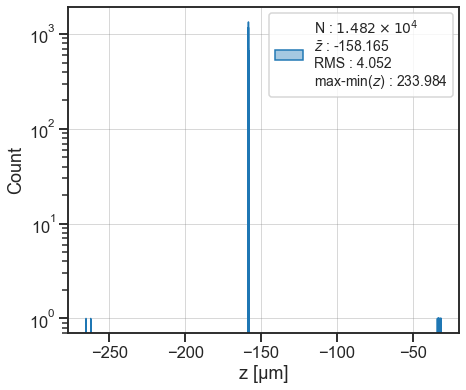

In [152]:
tdp.ts_hist(table_raw_data)
plt.yscale('log')

## second peaks detour

(<Figure size 864x864 with 5 Axes>,
 (<AxesSubplot:title={'center':'title'}>,
  <AxesSubplot:xlabel='x [mm]'>,
  <AxesSubplot:ylabel='y [mm]'>))

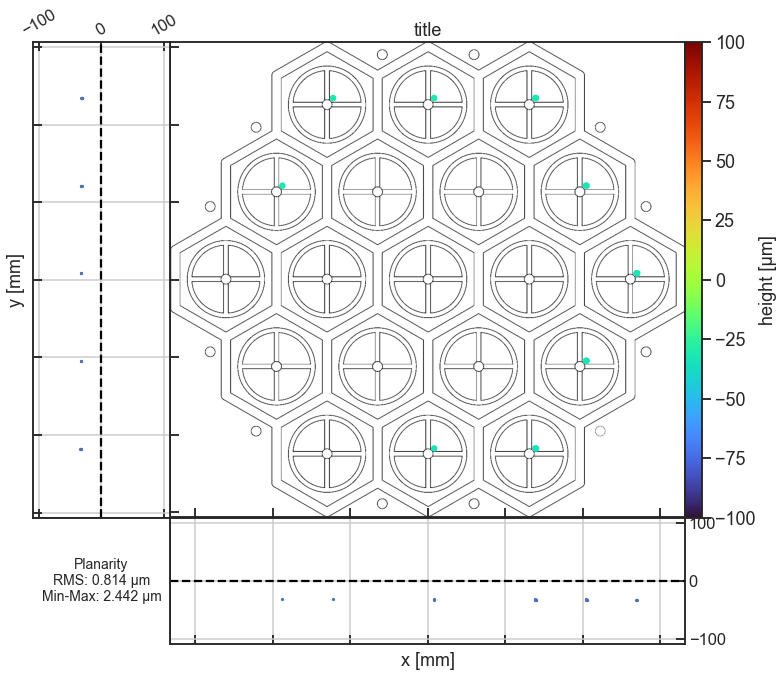

In [154]:
test_second_peak_table = table_raw_data.loc[table_raw_data.z > -100,:]
test_second_peak_table = test_second_peak_table.loc[-200 < test_second_peak_table.z,:]
tdp.plot_table_hexagon_flatness(test_second_peak_table, mode='z')

In [155]:
test_second_peak_table.point.unique()

array([1], dtype=int64)

only point 1 as usual 

## back on track

In [ ]:
table_raw_data = table_raw_data.loc[table_raw_data.z < -100,:]

In [ ]:
table_raw_data = table_raw_data.loc[-200 < table_raw_data.z,:]

(<Figure size 504x432 with 1 Axes>,
 <AxesSubplot:xlabel='z [µm]', ylabel='Count'>)

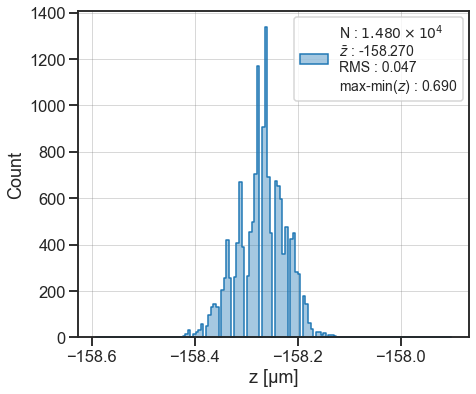

In [ ]:
tdp.ts_hist(table_raw_data)
# plt.yscale('log')

In [ ]:
table_raw_data.head(3)

,hex_nr,point,x,y,z
0,1,1,4.24,4.24,-158.189
1,1,1,4.74,4.24,-158.262
2,1,1,4.68,4.49,-158.226


In [ ]:
table_raw_data.keys()

Index(['hex_nr', 'point', 'x', 'y', 'z'], dtype='object')

In [ ]:
table_pt = old_point_table(table_raw_data, z_col='z')

In [156]:
table_pt.head(5)

,hex_nr,point,x,y,z_err,z_mean
0,1,1,4.24,4.24,0.015450,-158.254385
1,1,2,3.36,12.56,0.017050,-158.222846
2,1,3,9.19,9.19,0.014380,-158.240154
3,1,4,12.56,3.36,0.014845,-158.244077
4,1,5,19.32,5.18,0.015463,-158.261923


## Lao data

In [ ]:
Lao_NoVac_raw_data = meas_files['230921_LaoAll_NoVac.txt']

(<Figure size 504x432 with 1 Axes>,
 <AxesSubplot:xlabel='z [µm]', ylabel='Count'>)

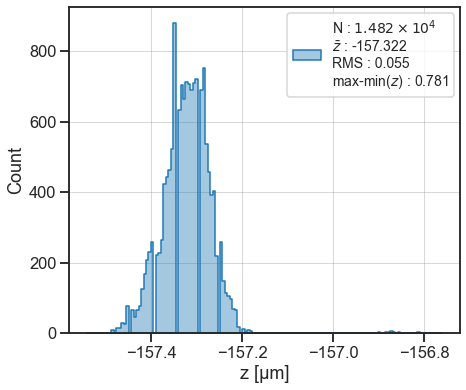

In [ ]:
tdp.ts_hist(Lao_NoVac_raw_data)
# plt.yscale('log')

In [ ]:
Lao_NoVac_raw_data = tdu.remove_outliers(Lao_NoVac_raw_data, cut_threshold=0.2)

(<Figure size 504x432 with 1 Axes>,
 <AxesSubplot:xlabel='z [µm]', ylabel='Count'>)

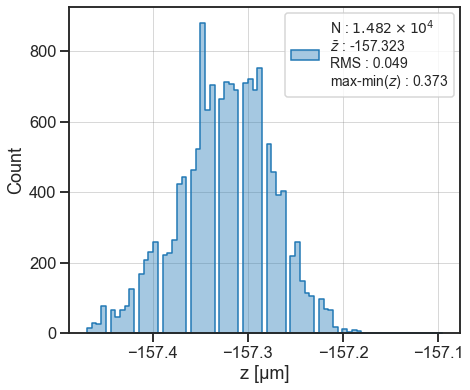

In [ ]:
tdp.ts_hist(Lao_NoVac_raw_data, mode='z_clean')

In [ ]:
Lao_NoVac_pt = old_point_table(Lao_NoVac_raw_data, z_col='z_clean')

In [ ]:
Lao_NoVac_pt.head(3)

,hex_nr,point,x,y,z_err,z_mean
0,1,1,4.24,4.24,0.013198,-157.291846
1,1,2,3.36,12.56,0.013948,-157.310615
2,1,3,9.19,9.19,0.014441,-157.320846


In [ ]:
lao_novac_sub_table_pt = tdu.combine_mean_measurements(Lao_NoVac_pt, table_pt)

In [ ]:
lao_novac_sub_table_pt = lao_novac_sub_table_pt.loc[lao_novac_sub_table_pt.z_mean > -300,:]

In [ ]:
lao_novac_sub_table_pt.z_mean = tdu.convert_mm_to_microns(lao_novac_sub_table_pt.z_mean)
lao_novac_sub_table_pt.z_mean = tdu.subtract_mean(lao_novac_sub_table_pt.z_mean)

(<Figure size 504x432 with 1 Axes>,
 <AxesSubplot:xlabel='z [µm]', ylabel='Count'>)

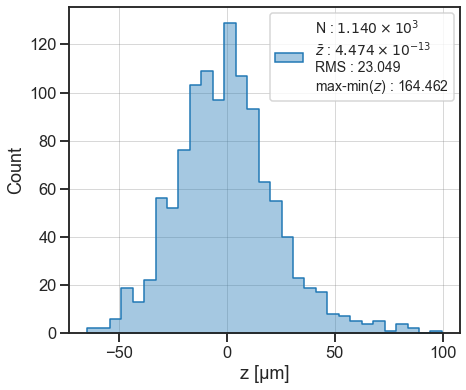

In [ ]:
tdp.ts_hist(lao_novac_sub_table_pt, mode='z_mean')

### lao Novac - table 

(<Figure size 864x864 with 5 Axes>,
 (<AxesSubplot:title={'center':'title'}>,
  <AxesSubplot:xlabel='x [mm]'>,
  <AxesSubplot:ylabel='y [mm]'>))

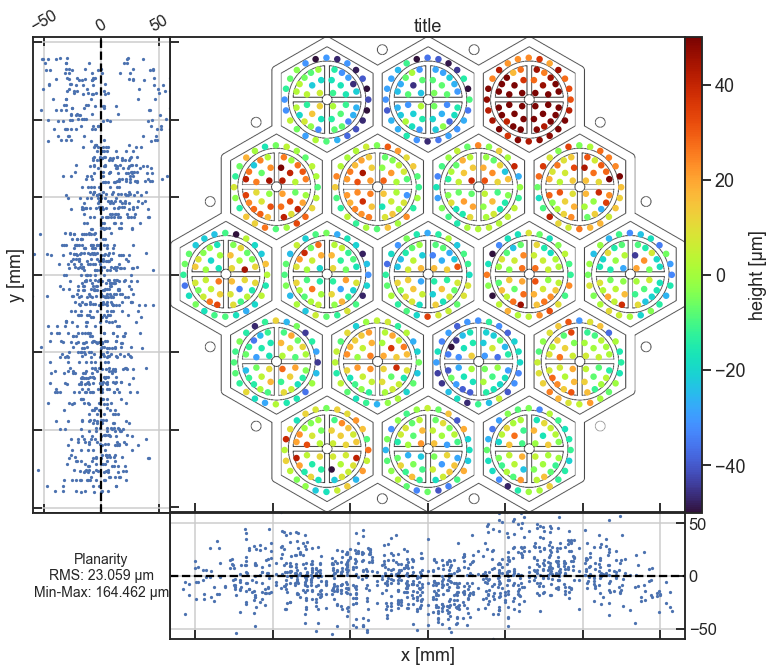

In [ ]:
%matplotlib inline
tdp.plot_table_hexagon_flatness(lao_novac_sub_table_pt,
                                cbar_norm=(-50, 0, 50),
                                # size=3**2, 
                                )

# Lao Plate Vac

In [ ]:
Lao_Vac_raw_data = meas_files['220921_LaoAll_Vac.txt']

(<Figure size 504x432 with 1 Axes>,
 <AxesSubplot:xlabel='z [µm]', ylabel='Count'>)

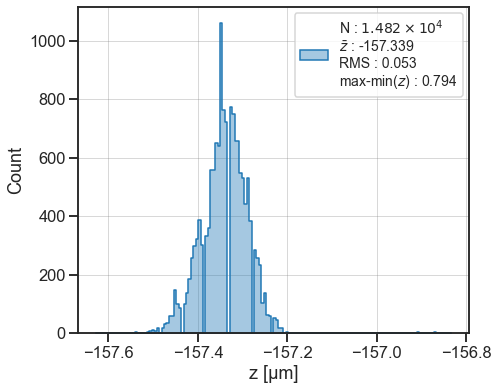

In [ ]:
tdp.ts_hist(Lao_Vac_raw_data)
# plt.yscale('log')

In [ ]:
Lao_Vac_raw_data = tdu.remove_outliers(Lao_Vac_raw_data, cut_threshold=0.2)

(<Figure size 504x432 with 1 Axes>,
 <AxesSubplot:xlabel='z [µm]', ylabel='Count'>)

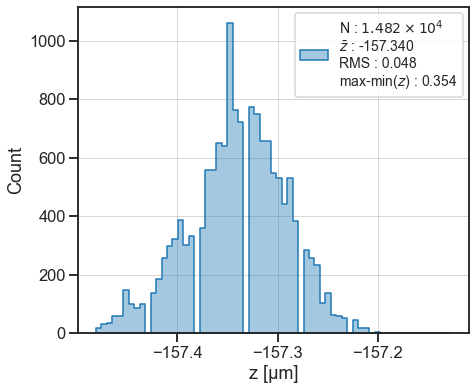

In [ ]:
tdp.ts_hist(Lao_Vac_raw_data, mode='z_clean')
# plt.yscale('log')

In [ ]:
Lao_Vac_pt = old_point_table(Lao_Vac_raw_data, z_col='z_clean')

(<Figure size 504x432 with 1 Axes>,
 <AxesSubplot:xlabel='z [µm]', ylabel='Count'>)

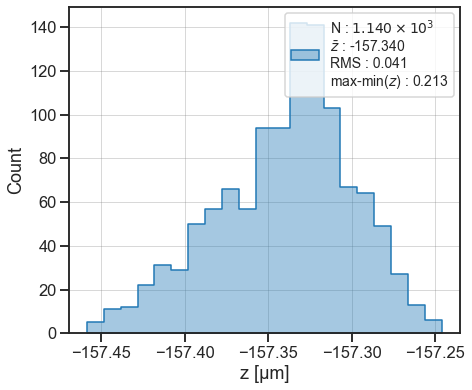

In [ ]:
tdp.ts_hist(Lao_Vac_pt,mode='z_mean')

# Lao Vac - NoVac

In [ ]:
Lao_Vac_NoVac_pt = tdu.combine_mean_measurements(Lao_Vac_pt, Lao_NoVac_pt)

In [ ]:
Lao_Vac_NoVac_pt.z_mean = tdu.convert_mm_to_microns(Lao_Vac_NoVac_pt.z_mean)
Lao_Vac_NoVac_pt.z_mean = tdu.subtract_mean(Lao_Vac_NoVac_pt.z_mean)

(<Figure size 864x864 with 5 Axes>,
 (<AxesSubplot:title={'center':'title'}>,
  <AxesSubplot:xlabel='x [mm]'>,
  <AxesSubplot:ylabel='y [mm]'>))

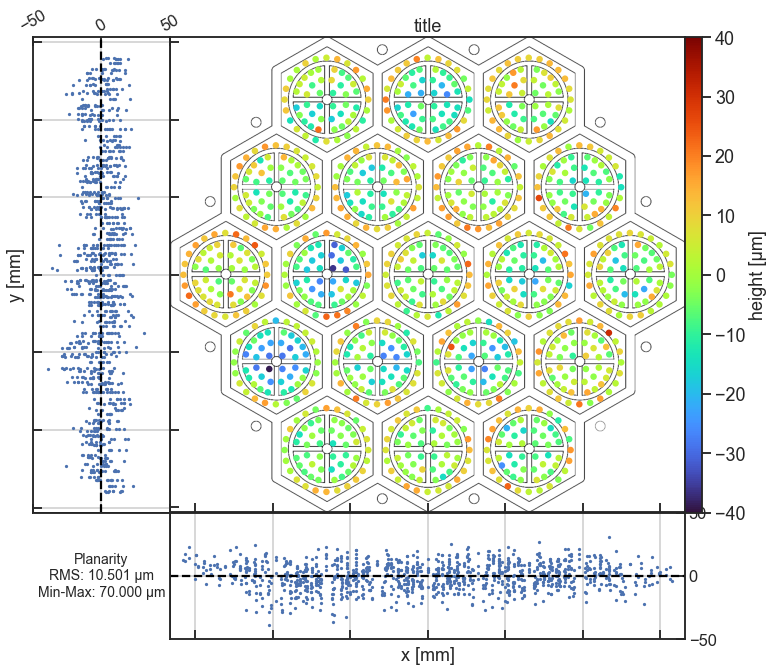

In [ ]:
tdp.plot_table_hexagon_flatness(Lao_Vac_NoVac_pt, cbar_norm=(-40, 0, 40))

# hexagon r vs z plots

In [ ]:
Lao_Vac_NoVac_pt.head(5)

,hex_nr,point,x,y,z_err,z_mean
0,1,1,4.24,4.24,0.019396,-5.354781
1,1,2,3.36,12.56,0.019474,-15.739396
2,1,3,9.19,9.19,0.020214,6.337527
3,1,4,12.56,3.36,0.019227,-5.970166
4,1,5,19.32,5.18,0.018832,-5.431704


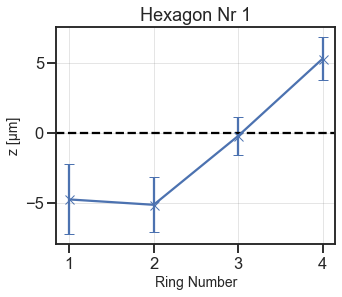

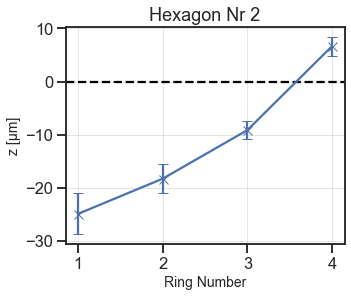

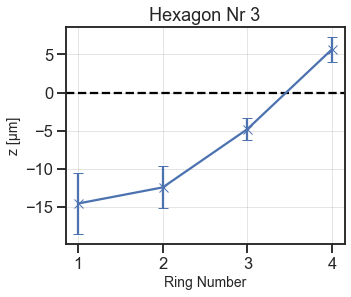

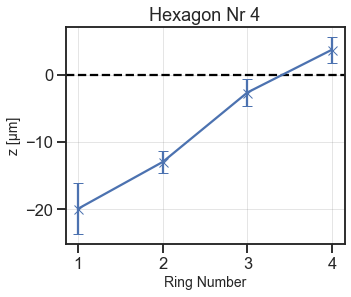

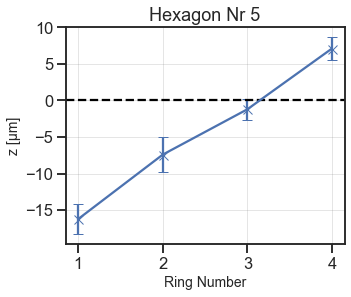

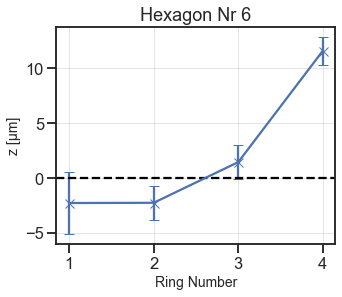

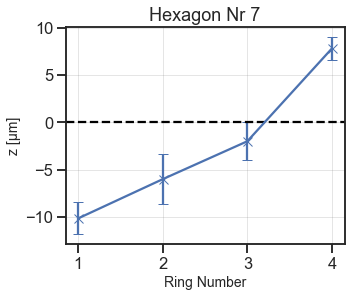

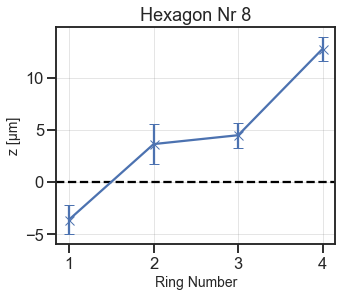

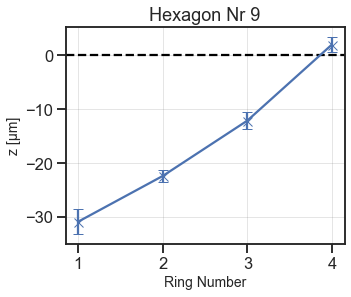

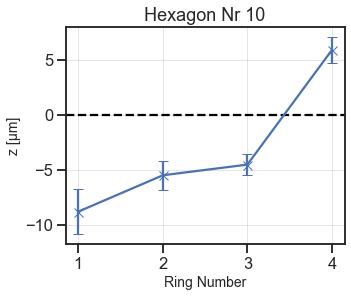

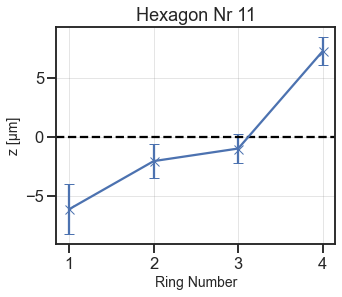

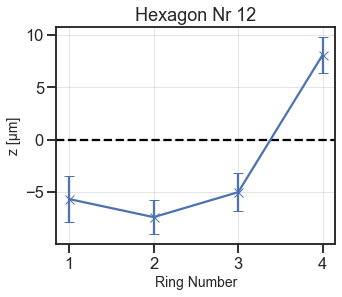

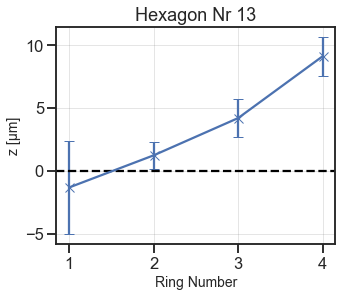

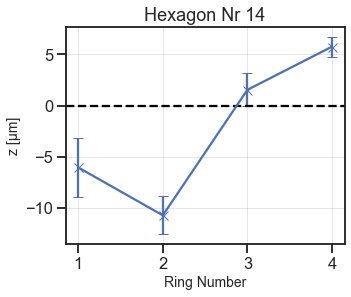

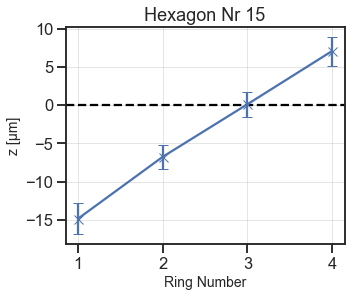

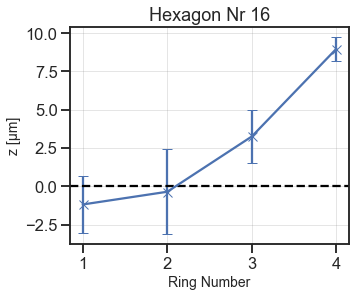

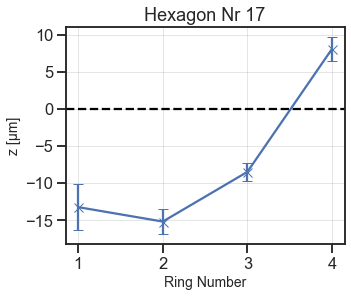

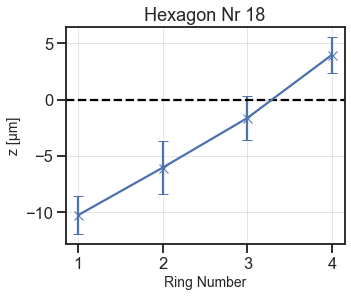

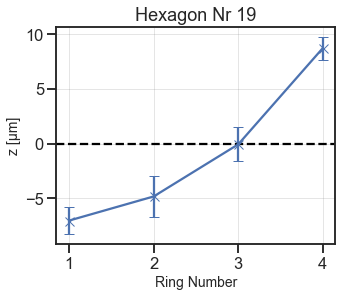

In [ ]:
full_plate_mean = Lao_Vac_NoVac_pt.z_mean.mean()
for hexagon in Lao_Vac_NoVac_pt.hex_nr.unique():
    data = Lao_Vac_NoVac_pt.query(f'hex_nr == {hexagon}')

    ring_data = {f'data_r{num+1}': data.query(f'point in {ring}') for num, ring in enumerate(rings) }
    rings_estimates = []
    rings_errors = []
    for ring_nr in range(1,5,1):
        data_test = ring_data[f'data_r{ring_nr}']['z_mean'].to_numpy()
        ring_mean = np.mean(ring_data[f'data_r{ring_nr}']['z_mean'].to_numpy())
        ring_std = np.std(data_test) / np.sqrt(len(data_test))
        # ring_mad = np.mean(ring_data[f'data_r{ring_nr}']['z', 'std'].to_numpy() / (ring_data[f'data_r{ring_nr}']['z', 'std'].to_numpy()))
        rings_estimates.append(ring_mean)
        rings_errors.append(ring_std)
        
    fig, ax = plt.subplots(1,1, figsize=(5,4))
    ax.errorbar(list(range(1,5,1)), rings_estimates, yerr=rings_errors, marker='x',capsize=5)
    ax.set_title(f'Hexagon Nr {hexagon}')
    ax.set_xlabel('Ring Number', fontsize=14)
    ax.set_ylabel('z [µm]', fontsize=14)
    ax.axhline(full_plate_mean,ls='--', c='black')
    plt.grid(color='grey', linestyle='-', linewidth=1, alpha=0.2)

# Plot with circles only for different vacuum - Single measurement dataset

In [ ]:
'30092021_tile1-lao-200mbar.txt'.split('.')[0].split('_')[1].split('-')[2]

'200mbar'

In [ ]:
meas_files_vac = tdu.read_txt_files(measurement_folder/'Vac_Test', old=True)
various_vac_lao_raw = {key.split('.')[0].split('_')[1].split('-')[2]: value  for key, value in meas_files_vac.items() if key.startswith('30092021')}
various_vac_lao_pt = {key: old_point_table(value) for key, value in various_vac_lao_raw.items()}

In [ ]:
ref_tile = Lao_NoVac_pt.loc[Lao_NoVac_pt.hex_nr==1,:]
various_vac_lao_pt['60mbar'] = ref_tile
all_lao_vac_novac_pt = {key: tdu.combine_mean_measurements(data, ref_tile) for key, data in various_vac_lao_pt.items()}

In [ ]:
all_lao_vac_novac_pt.keys()

dict_keys(['100mbar', '200mbar', '300mbar', '400mbar', '430mbar', '470mbar', '500mbar', '60mbar'])

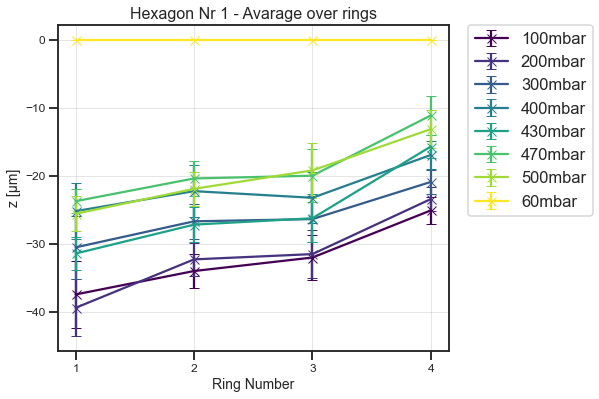

In [ ]:
from scipy.stats import median_abs_deviation as mad  
from matplotlib.pyplot import cm 

color = cm.viridis(np.linspace(0, 1, len(all_lao_vac_novac_pt.keys())))

fig, ax = plt.subplots(1,1, figsize=(7,6))
ax.set_title(f'Hexagon Nr 1 - Avarage over rings', fontsize=16)
ax.set_xlabel('Ring Number', fontsize=14)
ax.set_ylabel('z [µm]', fontsize=14)
for measurement, c in zip(all_lao_vac_novac_pt.items(), color):
    vacuum, data = measurement
    ring_data = {f'data_r{num+1}': data.query(f'point in {ring}') for num, ring in enumerate(rings)}
    # modes = ['median', 'error_std', 'error_median_abs_deviation']
    rings_estimates = []
    rings_errors = []
    for ring_nr in range(1,5,1):
        data_plot = ring_data[f'data_r{ring_nr}']
         
        data_test = ring_data[f'data_r{ring_nr}']['z_mean'].to_numpy()
        ring_median = np.mean(ring_data[f'data_r{ring_nr}']['z_mean'].to_numpy())
        ring_mad = np.std(data_test) / np.sqrt(len(data_test))
        # ring_mad = np.mean(ring_data[f'data_r{ring_nr}']['z', 'std'].to_numpy() / (ring_data[f'data_r{ring_nr}']['z', 'std'].to_numpy()))
        rings_estimates.append(ring_median*1e3)
        rings_errors.append(ring_mad*1e3)

    ax.errorbar(list(range(1,5,1)),
                rings_estimates,
                yerr=rings_errors,
                marker='x',
                label=vacuum,
                capsize=5, c=c)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.grid(color='grey', linestyle='-', linewidth=1, alpha=0.2)
ax.tick_params(labelsize=12)
ax.set_xticks(range(1,5,1))
